## Financial Forecasting for McDonald's : A Comparative Analysis of ARIMA and LSTM Models

### Import all necessary libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

### Load the dataset

In [2]:
mcdonalds_data = pd.read_csv("/Users/abdullahalrakin/Desktop/McDonalds_financial_statements.csv")

### Display the dataframe

In [3]:
mcdonalds_data

Year  Market cap ($B)  Revenue ($B)  Earnings ($B)  P/E ratio  P/S ratio  \
0   2022           193.01         23.18           7.82       31.3       8.33   
1   2021           200.31         23.22           9.12       26.5       8.63   
2   2020           159.88         19.20           6.14       33.8       8.32   
3   2019           147.47         21.28           8.01       24.8       6.93   
4   2018           136.21         21.02           7.81       23.2       6.48   
5   2017           137.21         22.82           8.57       26.7       6.01   
6   2016           101.08         24.62           6.86       22.0       4.11   
7   2015           107.12         25.41           6.55       24.2       4.22   
8   2014            90.22         27.44           7.37       19.2       3.29   
9   2013            96.09         28.10           8.20       17.3       3.42   
10  2012            88.44         27.56           8.07       16.3       3.21   
11  2011           102.65         27.00           8.01       18.8       3.80   
12  2010            80.87         24.07           7.00       16.5       3.36   
13  2009            67.22         22.74           6.48       15.0       2.96   
14  2008            69.31         23.52           6.15       16.2       2.95   
15  2007            67.84         22.78           3.57       29.3       2.98   
16  2006            53.36         20.81           3.88       15.4       2.56   
17  2005            42.59         20.46           3.70       16.4       2.08   
18  2004            40.71         19.06           3.20       17.6       2.14   
19  2003            31.33         17.14           2.34       21.4       1.83   
20  2002            20.39         15.40           1.66       23.0       1.32   

    P/B ratio  Operating Margin (%)  EPS ($)  Shares Outstanding ($B)  \
0      -32.20                 33.76     8.42                     0.73   
1      -43.50                 39.31    10.11                     0.74   
2      -20.40                 31.97     6.35                     0.74   
3      -18.00                 38.04     7.98                     0.74   
4      -21.80                 37.17     7.65                     0.76   
5      -42.00                 37.57     6.46                     0.79   
6      -45.90                 27.89     5.53                     0.81   
7       15.10                 25.80     4.88                     0.90   
8        7.02                 26.86     4.87                     0.96   
9        6.00                 29.19     5.60                     0.99   
10       5.78                 29.31     5.42                     1.00   
11       7.13                 29.67     5.34                     1.02   
12       5.53                 29.08     4.66                     1.05   
13       4.79                 28.52     4.17                     1.10   
14       5.18                 26.18     3.84                     1.11   
15       4.44                 15.68     2.01                     1.18   
16       3.45                 19.30     2.88                     1.23   
17       2.81                 18.09     2.06                     1.25   
18       2.87                 16.80     1.82                     1.25   
19       2.62                 13.69     1.16                     1.27   
20       1.98                 10.79     0.70                     1.27   

    Cash on Hand ($B)  Dividend Yield (%)  \
0                2.58                2.15   
1                4.70                1.96   
2                3.44                2.35   
3                0.89                2.39   
4                0.86                2.36   
5                2.46                2.23   
6                1.22                2.97   
7                7.68                2.91   
8                2.07                3.50   
9                2.79                3.22   
10               2.33                3.25   
11               2.33                2.52   
12               2.38                2.94   
13    

### Look for missing values

In [4]:
print("\nMissing values:\n", mcdonalds_data.isnull().sum())


Missing values:
 Year                                   0
Market cap ($B)                        0
Revenue ($B)                           0
Earnings ($B)                          0
P/E ratio                              0
P/S ratio                              0
P/B ratio                              0
Operating Margin (%)                   0
EPS ($)                                0
Shares Outstanding ($B)                0
Cash on Hand ($B)                      0
Dividend Yield (%)                     0
Dividend (stock split adjusted) ($)    0
Net assets ($B)                        0
Total assets ($B)                      0
Total debt ($B)                        0
Total liabilities ($B)                 0
dtype: int64


### Check data types

In [5]:
print("Data types and missing values:")
mcdonalds_data.info()

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 21 non-null     int64  
 1   Market cap ($B)                      21 non-null     float64
 2   Revenue ($B)                         21 non-null     float64
 3   Earnings ($B)                        21 non-null     float64
 4   P/E ratio                            21 non-null     float64
 5   P/S ratio                            21 non-null     float64
 6   P/B ratio                            21 non-null     float64
 7   Operating Margin (%)                 21 non-null     float64
 8   EPS ($)                              21 non-null     float64
 9   Shares Outstanding ($B)              21 non-null     float64
 10  Cash on Hand ($B)                    21 non-null     float64
 11  Div

## Exploratory Data Analysis (EDA)

### Summary statistics

In [6]:
print("Summary statistics:")
mcdonalds_data.describe().style.background_gradient(cmap="twilight_shifted")

Summary statistics:


## Data Visualizations

### Visualization 01 : Revenue trend over the years

In [7]:
fig = px.line(mcdonalds_data, x='Year', y='Revenue ($B)', title="McDonald's Revenue Trend")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Revenue ($B)")
fig.show()

### Visualization 02 : Decompose time series to identify trends, seasonality, and residuals

Decomposition of Revenue:


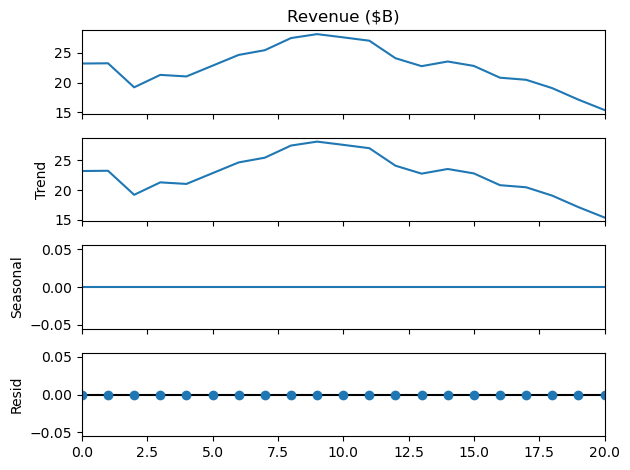

In [9]:
def decompose_time_series(data):
    result = seasonal_decompose(data, model='additive', period=1)
    result.plot()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=result.trend, mode='lines', name='Trend'))
    fig.add_trace(go.Scatter(x=data.index, y=result.seasonal, mode='lines', name='Seasonal'))
    fig.add_trace(go.Scatter(x=data.index, y=result.resid, mode='lines', name='Residual'))
    fig.update_layout(title="Decomposition of Revenue")
    fig.show()

# Perform decomposition for revenue
print("Decomposition of Revenue:")
decompose_time_series(mcdonalds_data['Revenue ($B)'])

### Visualization 03: Revenue Distribution Histogram

In [13]:
fig = px.histogram(mcdonalds_data, x='Revenue ($B)', nbins=10, title='Distribution of Revenue')
fig.update_layout(bargap=0.01)
fig.show()

### Visualization 04 : Annual Growth Rate

In [14]:
mcdonalds_data['Revenue Growth Rate'] = mcdonalds_data['Revenue ($B)'].pct_change() * 100
fig = px.line(mcdonalds_data, x='Year', y='Revenue Growth Rate', title='Annual Revenue Growth Rate')
fig.show()

### Visualization 05: Bar chart for financial metrics comparison

In [10]:
fig = px.bar(mcdonalds_data, x='Year', y=['Market cap ($B)', 'Earnings ($B)', 'Operating Margin (%)'],
             title="Financial Metrics Comparison Over Time", labels={'value': 'Amount ($B)'},
             barmode='group')
fig.show()

### Visualization 06: Stacked area chart for total assets composition

In [11]:
fig = px.area(mcdonalds_data, x='Year', y=['Cash on Hand ($B)', 'Net assets ($B)', 'Total assets ($B)'],
              title="Composition of Total Assets Over Time", labels={'value': 'Amount ($B)'},
              hover_name="Year")
fig.show()

### Visualization 07: Boxplot of Key Metrics

In [12]:
# Select key financial metrics
key_metrics = ['Revenue ($B)', 'Earnings ($B)', 'Operating Margin (%)']

# Plot boxplots
fig = px.box(mcdonalds_data, x='Year', y=key_metrics, title='Boxplot of Key Financial Metrics Over Time')
fig.show()

print("No outliers detected in the plot")

No outliers detected in the plot


### Visualization 08 : Financial Ratios Trends

In [15]:
financial_ratios = ['P/E ratio', 'P/S ratio', 'P/B ratio']
fig = px.line(mcdonalds_data, x='Year', y=financial_ratios,
              title='Trends of Financial Ratios Over Time')
fig.show()

### Visualization 09 : Feature Correlation Matrix

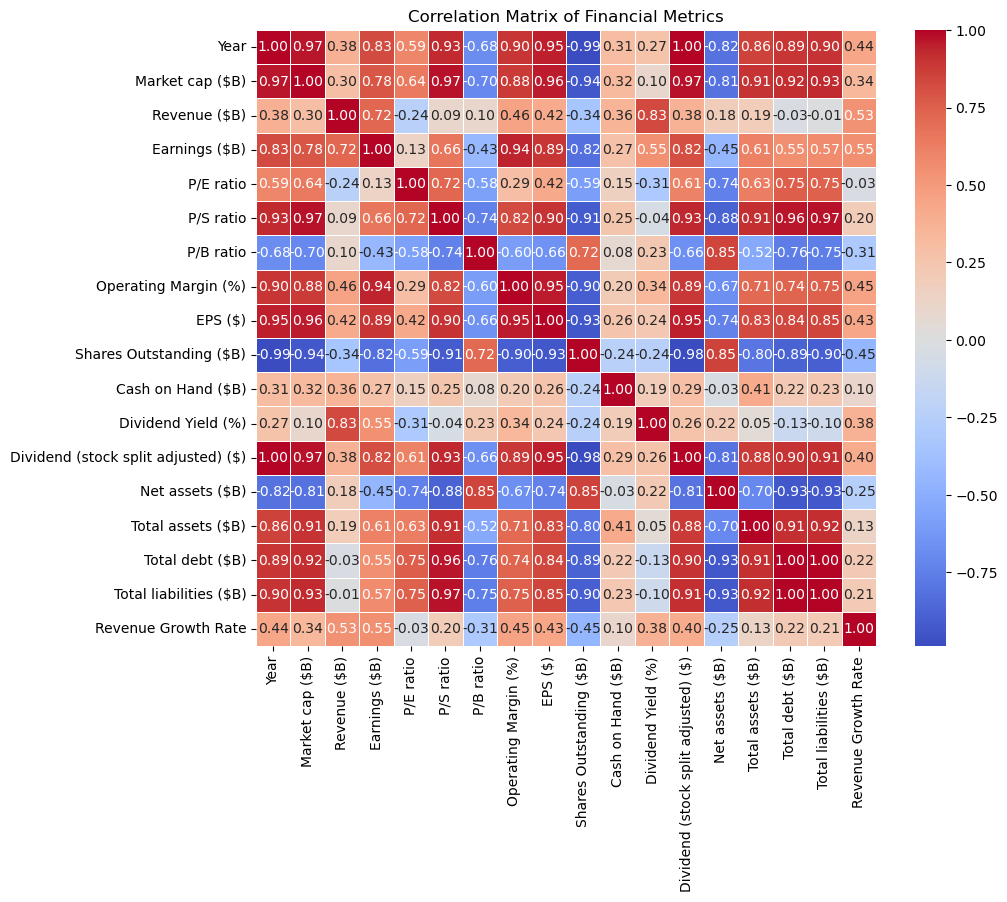

In [16]:
# Generate correlation matrix
correlation_matrix = mcdonalds_data.corr()

# Plot interactive heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Financial Metrics")
plt.show()

### Visualization 10 : Feature Correlation Matrix & Pairplot

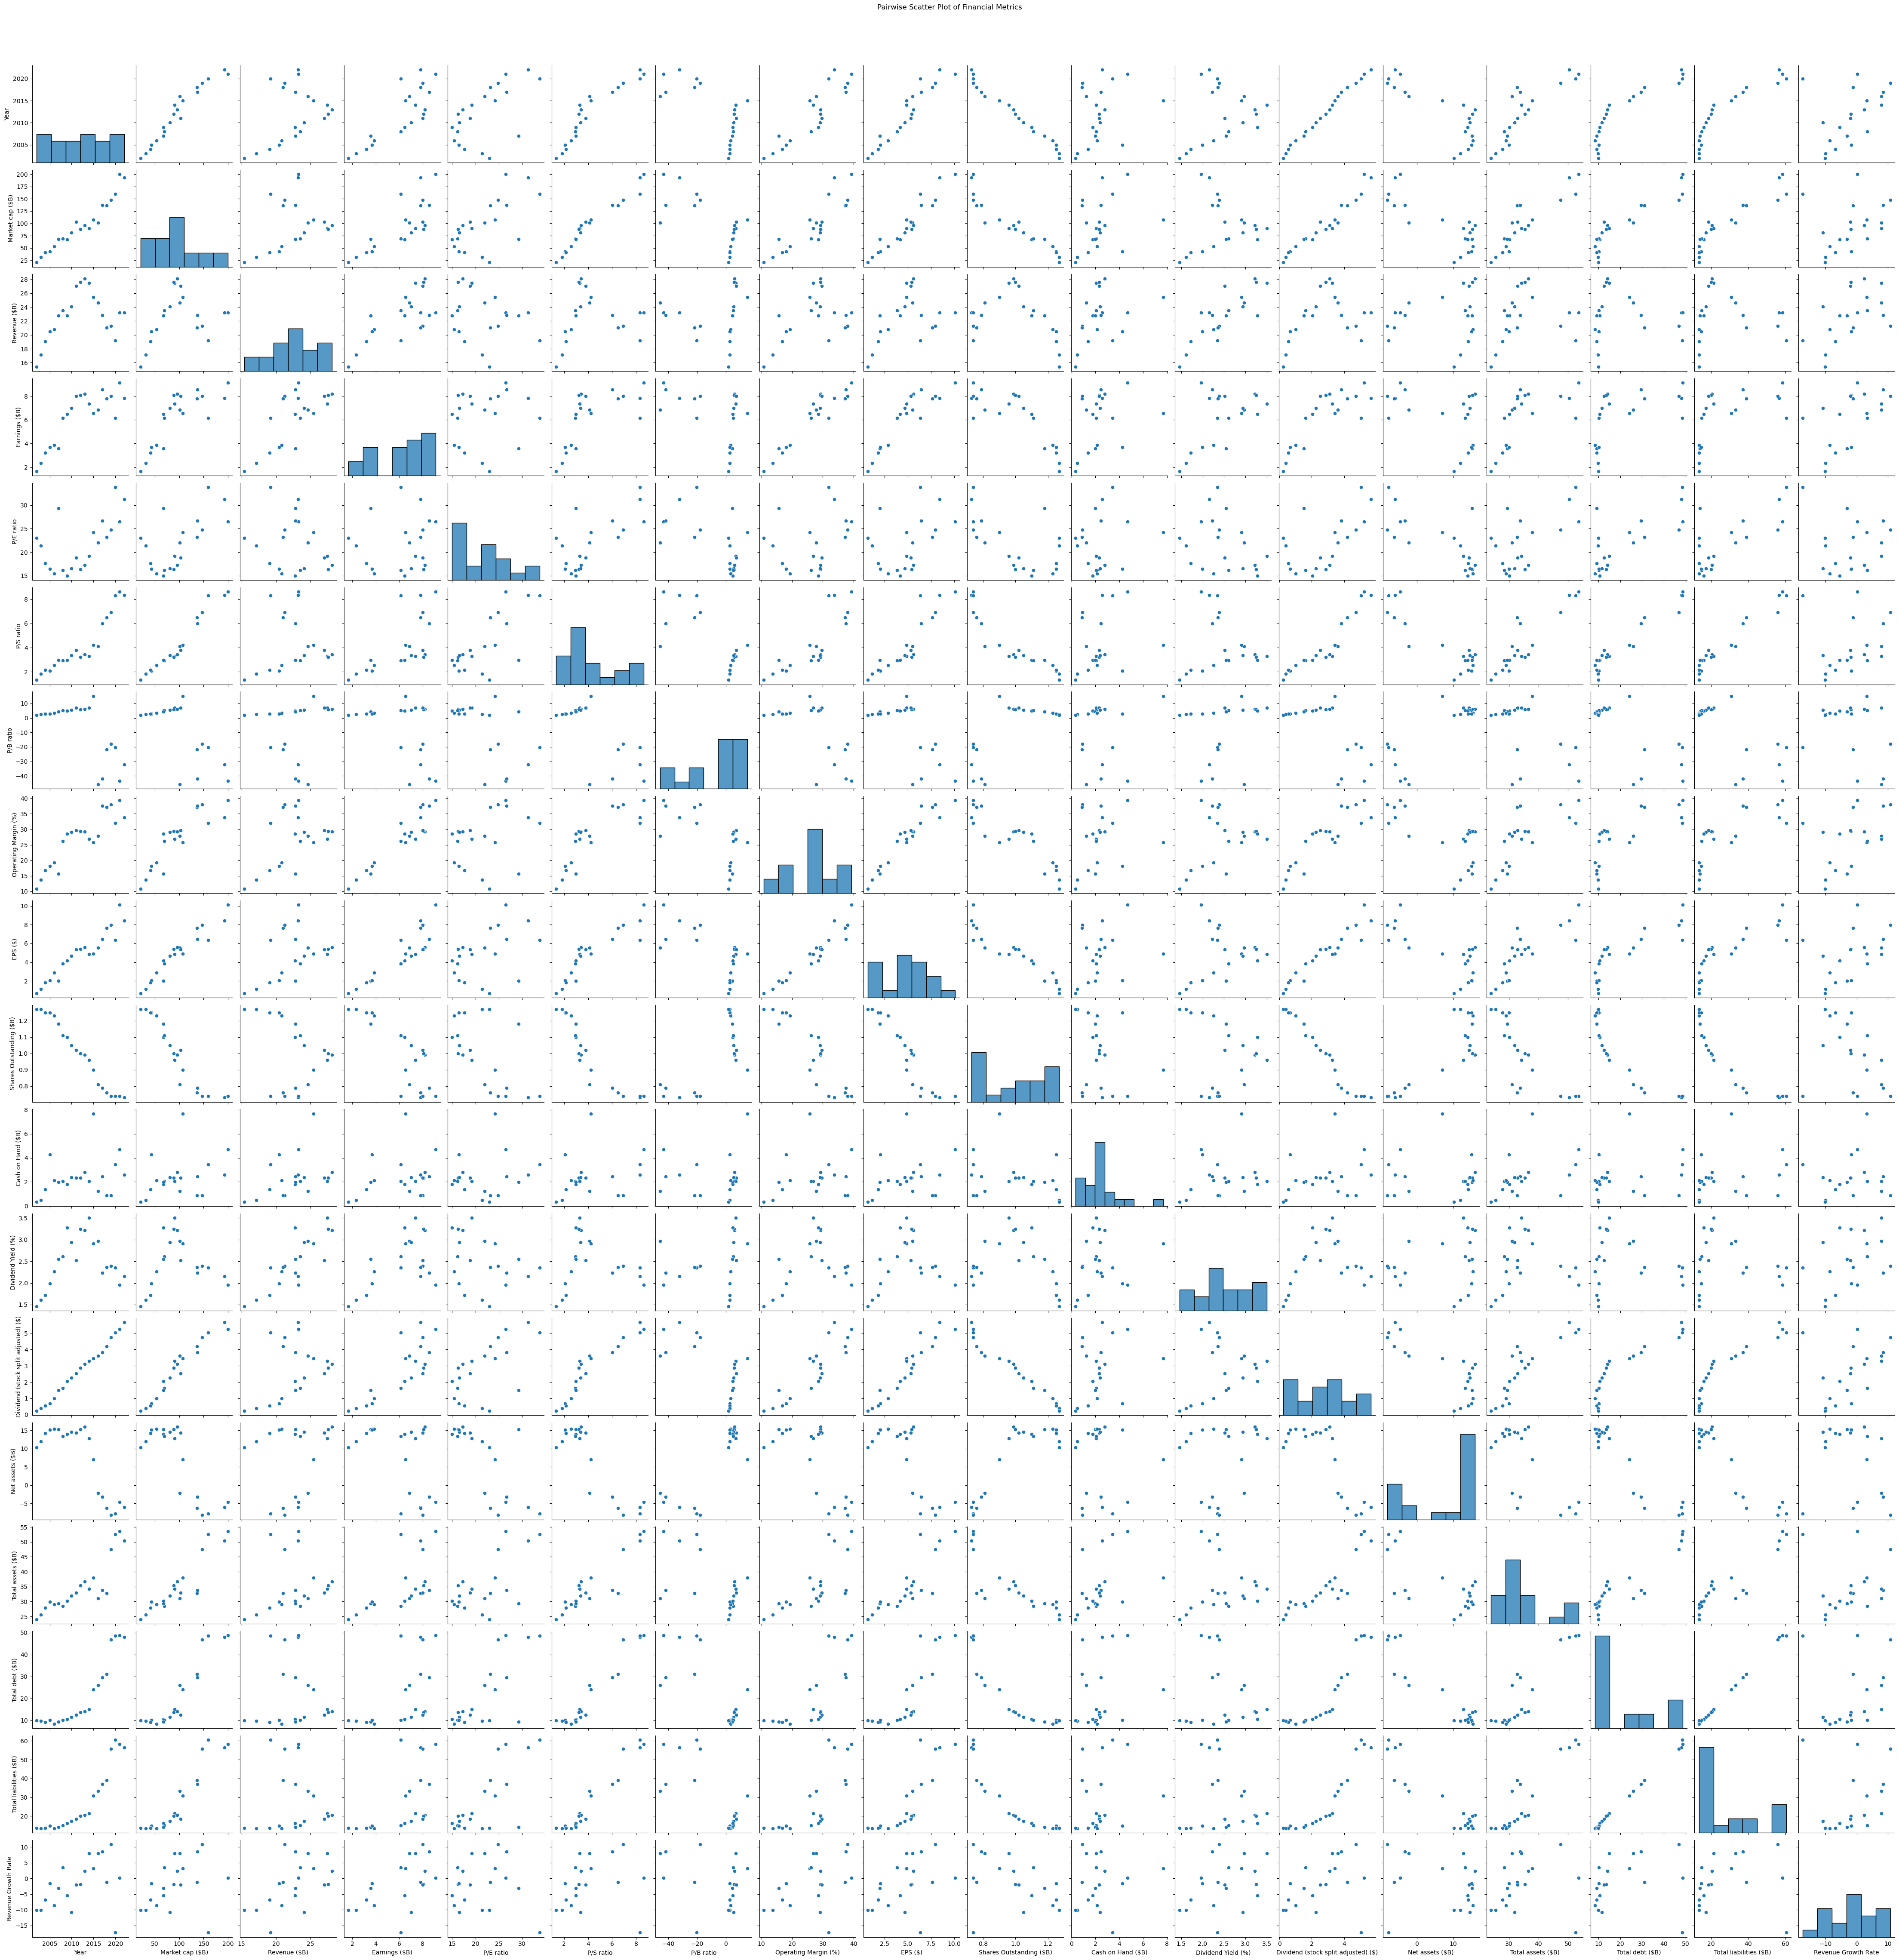

In [17]:
# Generate correlation matrix
correlation_matrix = mcdonalds_data.corr()

# Plot interactive heatmap
fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                                x=correlation_matrix.index,
                                y=correlation_matrix.columns,
                                colorscale='Viridis',  # Using the 'Viridis' colorscale
                                zmin=-1, zmax=1))
fig.update_layout(title="Correlation Matrix of Financial Metrics")
fig.show()

# Scatter plot matrix
scatter_matrix = sns.pairplot(mcdonalds_data)
scatter_matrix.fig.suptitle("Pairwise Scatter Plot of Financial Metrics", y=1.02)
plt.show()


## ARIMA Forecast

In [18]:
def forecast_arima(data):
    # Convert 'Year' column to datetime
    data['Year'] = pd.to_datetime(data['Year'], format='%Y')
    data.set_index('Year', inplace=True)
    # Sort index in ascending order
    data.sort_index(inplace=True)
    # Specify frequency of the datetime index
    data.index.freq = 'AS'
    # Fit ARIMA model
    model = ARIMA(data['Revenue ($B)'], order=(3,1,1))
    model_fit = model.fit()
    # Forecast
    forecast = model_fit.forecast(steps=15)
    return forecast

## Forecasting using LSTM

### Normalize the data for LSTM

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(mcdonalds_data['Revenue ($B)'].values.reshape(-1, 1))

### Adjust Time Steps

In [20]:
time_step = 15

### Define a function to create input sequences for LSTM

In [21]:
def create_dataset(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step):
        # Extract a sequence of length 'time_step' from the data
        sequence_x = data[i:(i + time_step), 0]
        # Append the sequence to X
        X.append(sequence_x)
        # Extract the target value (next value after the sequence)
        target_y = data[i + time_step, 0]
        # Append the target value to Y
        Y.append(target_y)
    # Convert X and Y to numpy arrays
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

### Create input sequences for LSTM

In [22]:
X_train, Y_train = create_dataset(scaled_data, time_step)

### Reshape Y_train to match the shape of X_train

In [23]:
Y_train = Y_train.reshape(-1, 1)

### Define input shape

In [24]:
input_shape = (X_train.shape[1], 1)

### Build LSTM model

In [25]:
model = Sequential([
    Input(shape=input_shape),
    LSTM(units=100, return_sequences=True),
    LSTM(units=100),
    Dense(units=6)
])
model.compile(optimizer='adam', loss='mean_squared_error')

### Train the model

In [26]:
history = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=0)

### Extract test data

In [27]:
test_data = mcdonalds_data['Revenue ($B)'].values.reshape(-1, 1)[-time_step:]
scaled_test_data = scaler.transform(test_data)
X_test = scaled_test_data.reshape(1, time_step, 1)

### Make predictions with LSTM

In [28]:
predicted_revenue_lstm = model.predict(X_test)
predicted_revenue_lstm = scaler.inverse_transform(predicted_revenue_lstm).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


### Print predicted revenue

In [29]:
print("Predicted Revenue (LSTM):", predicted_revenue_lstm[0])

Predicted Revenue (LSTM): 14.243899


### Forecast with ARIMA

In [30]:
forecast_arima_values = forecast_arima(mcdonalds_data).values.flatten()

### Plot actual and forecasted revenue

In [31]:
years_index = mcdonalds_data.index 
forecast_years = np.arange(years_index[-1].year + 1, years_index[-1].year + 9)  # Adjusted to predict until 2030

fig = go.Figure()
fig.add_trace(go.Scatter(x=years_index, y=mcdonalds_data['Revenue ($B)'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=forecast_years, y=forecast_arima_values, mode='lines', name='ARIMA Forecast'))
fig.add_trace(go.Scatter(x=forecast_years, y=np.append(mcdonalds_data['Revenue ($B)'].iloc[-1], predicted_revenue_lstm),
                         mode='lines', name='LSTM Forecast'))
fig.update_layout(title="McDonald's Revenue Forecast Comparison", xaxis_title="Year", yaxis_title="Revenue ($B)")
fig.show()

# Financial Forecasting for McDonald's: A **Comparative Analysis** of ARIMA and LSTM Models

## Introduction
This project aims to forecast the revenue of **McDonald's** using two different time-series forecasting techniques: **Autoregressive Integrated Moving Average (ARIMA)** and **Long Short-Term Memory (LSTM)** neural networks. The goal is to compare the performance of these models in predicting McDonald's revenue and provide insights into their respective strengths and weaknesses.

## Data Loading and Preprocessing
- **Imported** necessary libraries and **loaded** the financial dataset of McDonald's from a CSV file.
- Checked for **missing values** and inspected **data types** for consistency.

## Exploratory Data Analysis (EDA)
- Conducted **exploratory analysis** to gain insights into underlying trends and patterns.
- Analyzed **summary statistics**, visualized revenue trends over the years, and decomposed time series to identify **trends** and **seasonality**.
- Examined the **distribution** of revenue using histograms, analyzed **annual growth rates**, and visualized financial metrics comparisons.
- Explored **correlations** between different financial metrics using **correlation matrices** and **pairplots**.

## ARIMA Forecasting
- Applied the **ARIMA model** to forecast McDonald's revenue.
- Decomposed the time series, **fitted** the ARIMA model with appropriate parameters, and generated forecasts for future time periods.
- Compared forecasted values with **actual revenue data** using visualizations.

## LSTM Forecasting
- **Normalized** the revenue data and created input sequences for the **LSTM model**.
- Constructed an **LSTM neural network** with two LSTM layers and a dense output layer.
- Trained the model using historical revenue data and evaluated its performance on a test set.
- Made **predictions** for future time periods and compared them with ARIMA forecasts and actual revenue data.

## Results and Conclusion
- Compared **ARIMA and LSTM models** in terms of accuracy and effectiveness in forecasting McDonald's revenue.
- Provided insights into the suitability of each model for financial forecasting tasks.
- Offered recommendations for further improvements and future research directions.

## Conclusion
Financial forecasting plays a crucial role in decision-making for businesses, and this project demonstrates the application of two popular forecasting methods, ARIMA and LSTM, in predicting McDonald's revenue. By comparing and contrasting the performance of these models, stakeholders can make informed decisions to optimize business strategies and financial planning.
